In [1]:
import pandas as pd
import numpy as np
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.utils import to_time_series_dataset
import matplotlib.pyplot as plt

c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [3]:
df = pd.read_csv("../notebooks/entregable/datasets/periodo_x_producto_con_target.csv", sep=',', encoding='utf-8')
df

product_id  periodo  nacimiento_producto  muerte_producto  mes_n  \
0           20001   201701               201701           201912      1   
1           20001   201702               201701           201912      2   
2           20001   201703               201701           201912      3   
3           20001   201704               201701           201912      4   
4           20001   201705               201701           201912      5   
...           ...      ...                  ...              ...    ...   
31357       21281   201704               201702           201708      3   
31358       21281   201705               201702           201708      4   
31359       21281   201706               201702           201708      5   
31360       21281   201707               201702           201708      6   
31361       21281   201708               201702           201708      7   

       total_meses  producto_nuevo  ciclo_de_vida_inicial cat1         cat2  \
0               36               0                      0   HC  ROPA LAVADO   
1               36               0                      0   HC  ROPA LAVADO   
2               36               0                      0   HC  ROPA LAVADO   
3               36               0                      0   HC  ROPA LAVADO   
4               36               0                      0   HC  ROPA LAVADO   
...            ...             ...                    ...  ...          ...   
31357            7               1                      1  NaN          NaN   
31358            7               1                      0  NaN          NaN   
31359            7               1                      0  NaN          NaN   
31360            7               1                      0  NaN          NaN   
31361            7               1                      0  NaN          NaN   

          cat3  brand  sku_size  stock_final          tn  \
0      Liquido  ARIEL    3000.0          NaN   934.77222   
1      Liquido  ARIEL    3000.0          NaN   798.01620   
2      Liquido  ARIEL    3000.0          NaN  1303.35771   
3      Liquido  ARIEL    3000.0          NaN  1069.96130   
4      Liquido  ARIEL    3000.0          NaN  1502.20132   
...        ...    ...       ...          ...         ...   
31357      NaN    NaN       NaN          NaN     0.00000   
31358      NaN    NaN       NaN          NaN     0.00000   
31359      NaN    NaN       NaN          NaN     0.09134   
31360      NaN    NaN       NaN          NaN     0.00000   
31361      NaN    NaN       NaN          NaN     0.03500   

       plan_precios_cuidados  cust_request_qty  cust_request_tn      target  
0                        0.0             479.0        937.72717  1303.35771  
1                        0.0             432.0        833.72187  1069.96130  
2                        0.0             509.0       1330.74697  1502.20132  
3                        0.0             279.0       1132.94430  1520.06539  
4                        0.0             701.0       1550.68936  1030.67391  
...                      ...               ...              ...         ...  
31357                    NaN               NaN              NaN     0.09134  
31358                    NaN               NaN              NaN     0.00000  
31359                    0.0               8.0          0.10539     0.03500  
31360                    NaN               NaN              NaN         NaN  
31361                    0.0               1.0          0.03500         NaN  

[31362 rows x 19 columns]

In [4]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.metrics import dtw
import matplotlib.pyplot as plt

# Suponiendo que df tiene columnas: periodo, product_id, tn
df_pivot = df.pivot(index='product_id', columns='periodo', values='tn')

# Reemplazar NaNs si es necesario (por ejemplo con 0, o forward fill)
df_pivot = df_pivot.fillna(0)

# Convertir a numpy array (con forma: [n_series, n_timesteps, 1])
time_series_data = df_pivot.values[:, :, np.newaxis]

inertias = []
for k in range(2, 100):
    model = TimeSeriesKMeans(n_clusters=k, metric="dtw", random_state=42)
    model.fit(time_series_data)
    inertias.append(model.inertia_)

plt.plot(range(2, 100), inertias, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia (Distancia total)')
plt.title('Método del Codo con DTW')
plt.show()


c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


KeyboardInterrupt: 

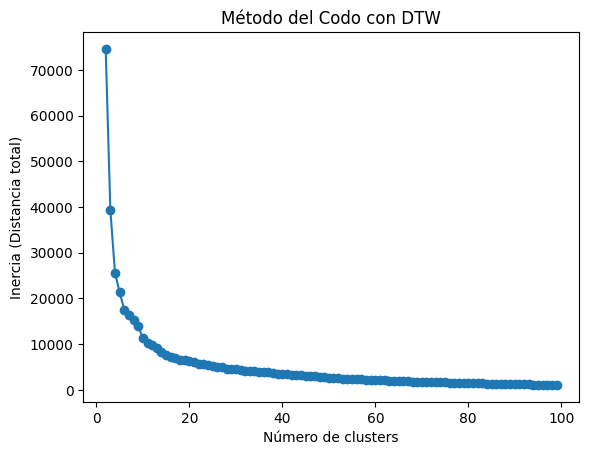

In [7]:
plt.plot(range(2, 100), inertias, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia (Distancia total)')
plt.title('Método del Codo con DTW')
plt.show()

c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


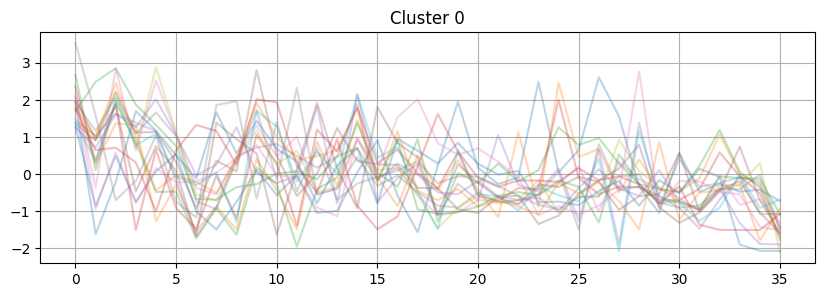

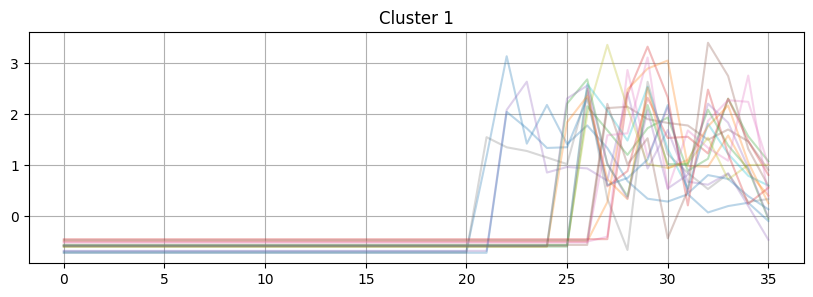

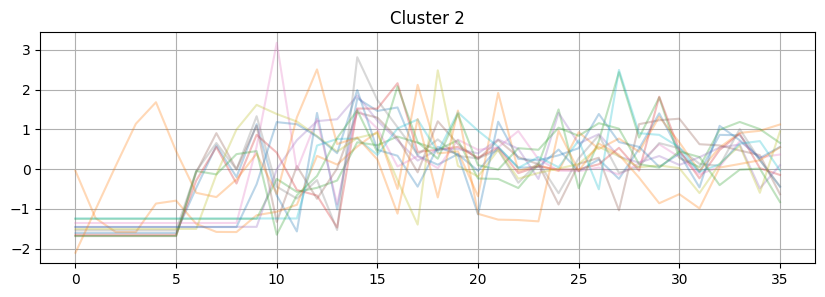

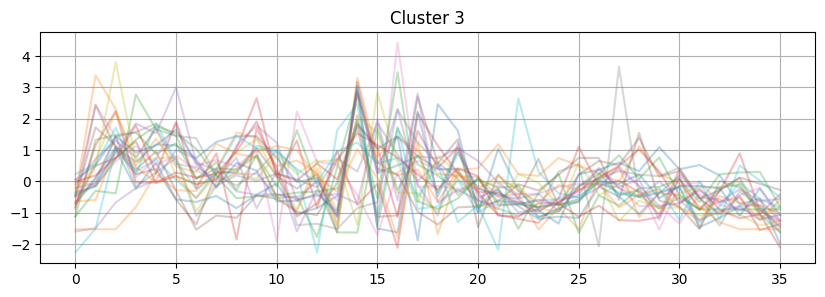

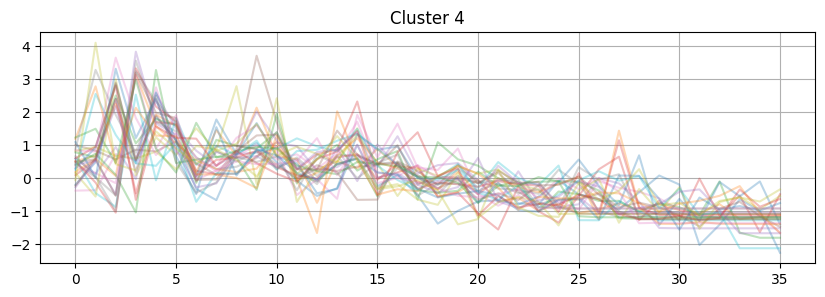

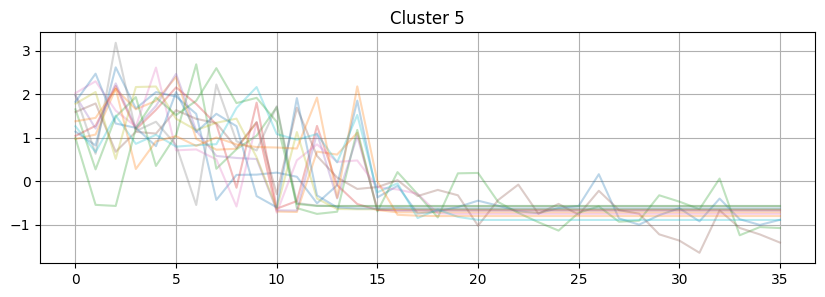

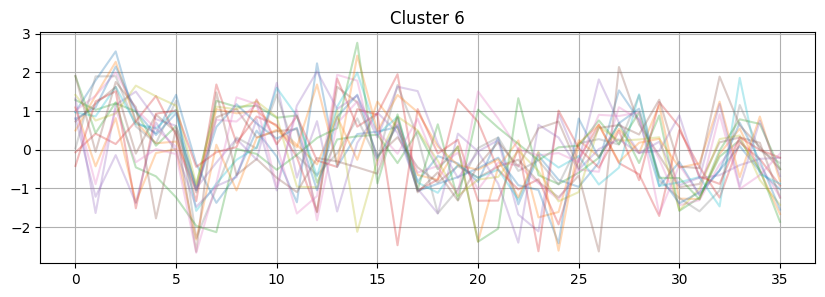

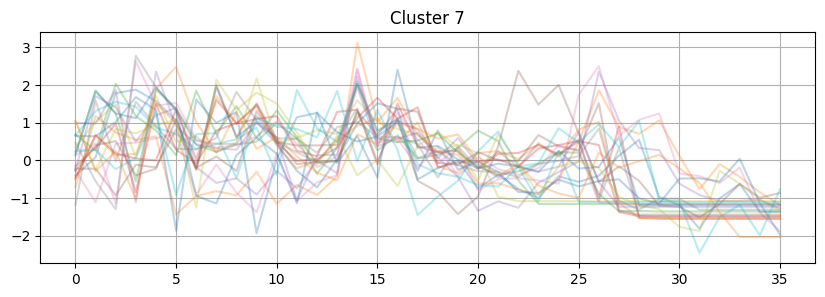

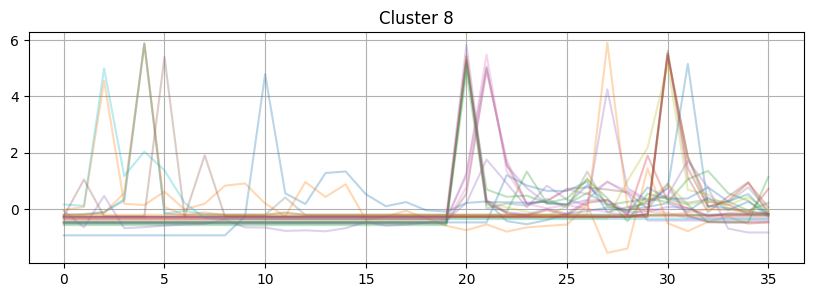

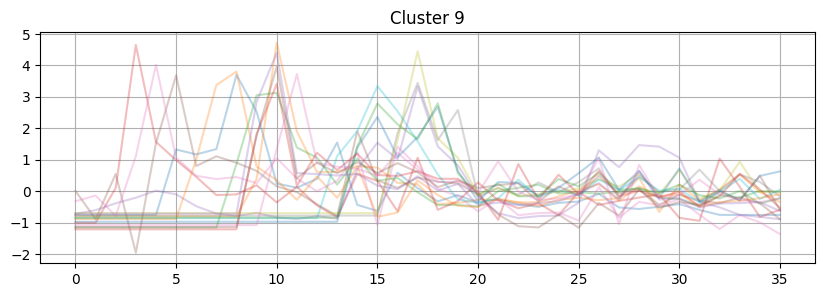

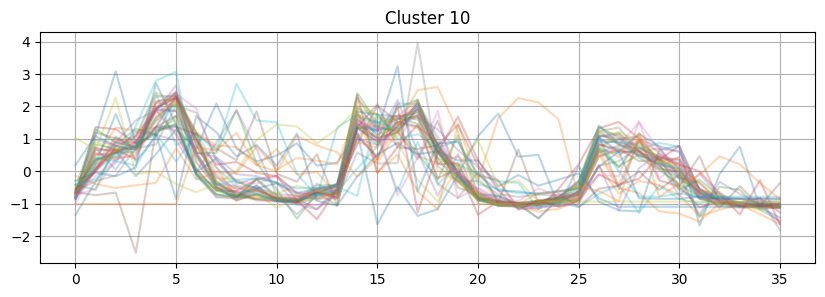

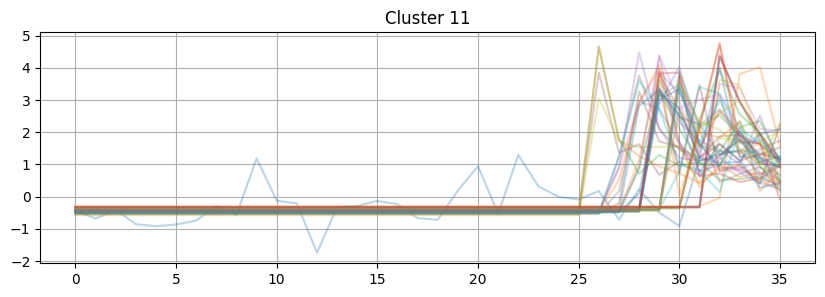

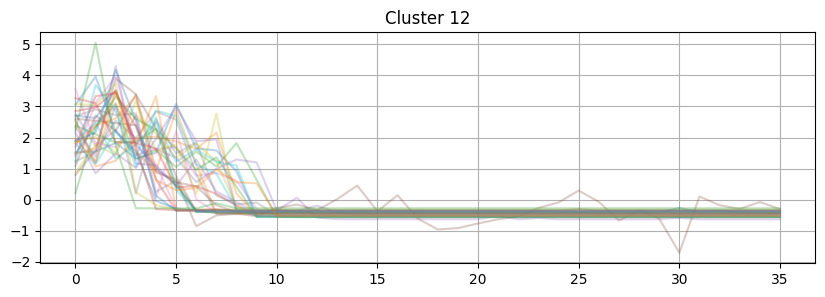

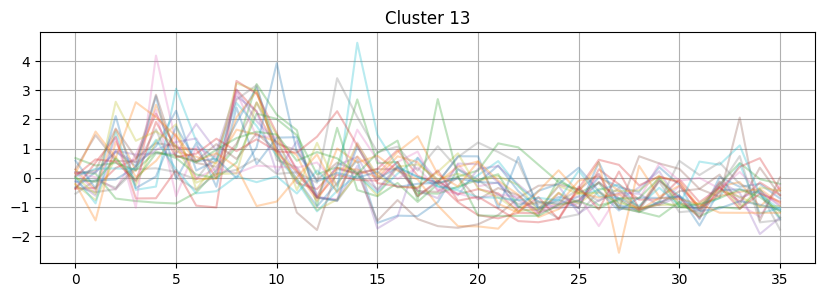

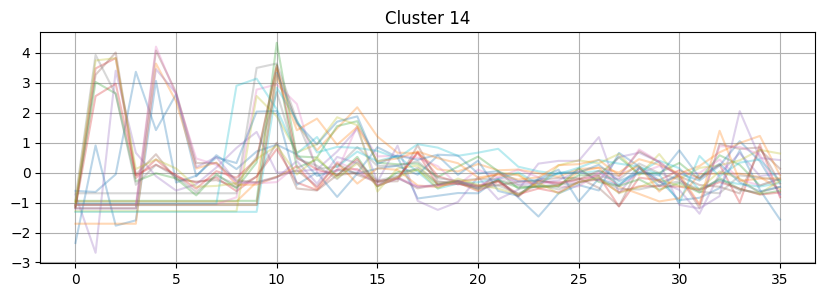

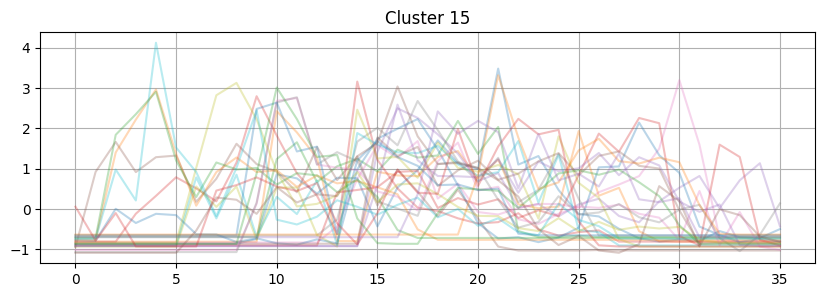

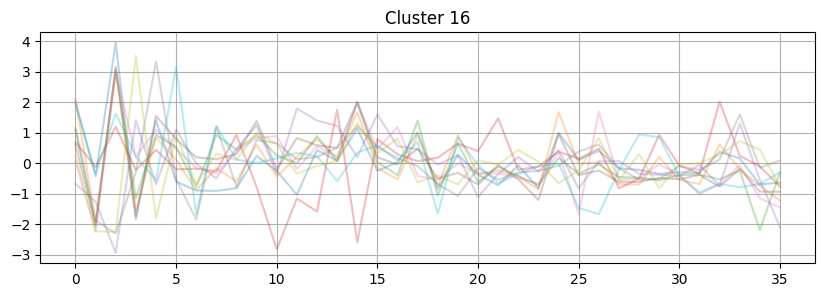

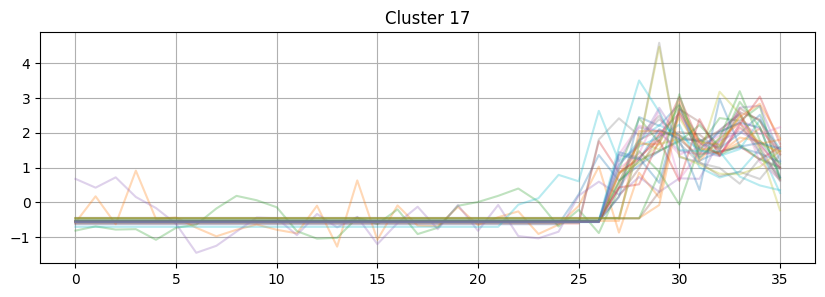

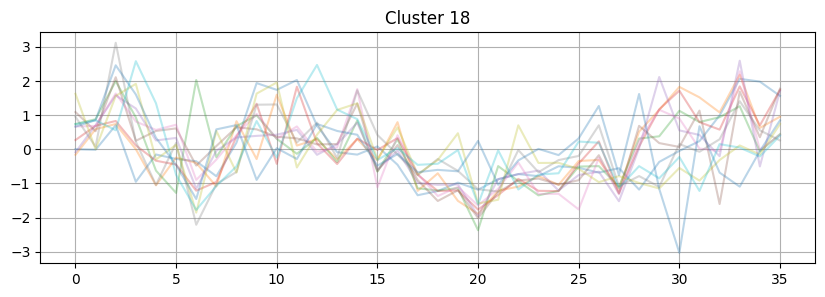

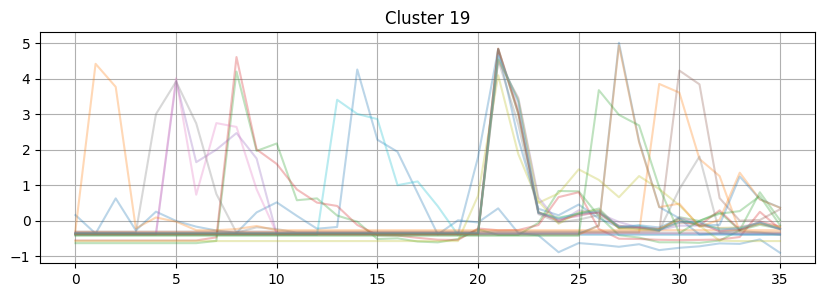

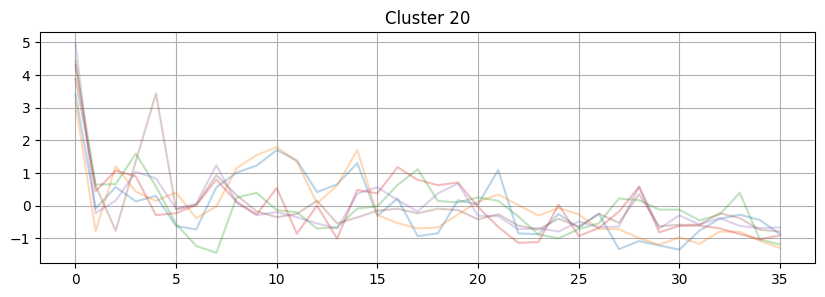

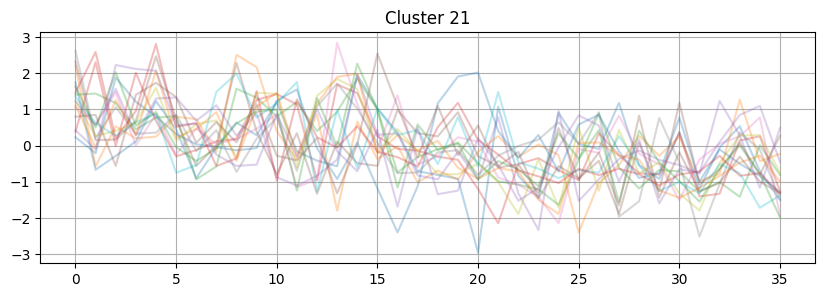

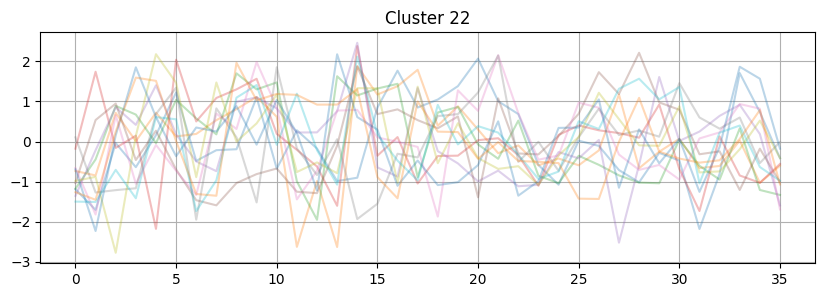

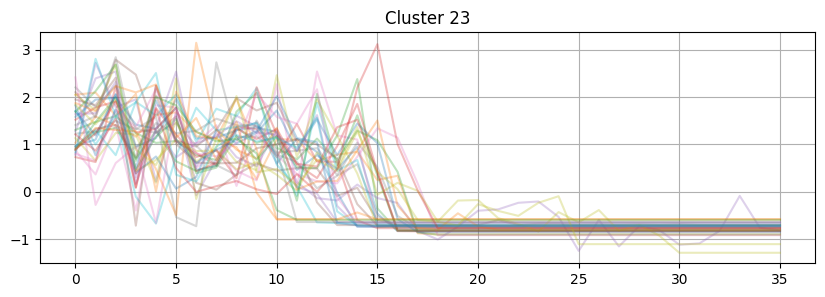

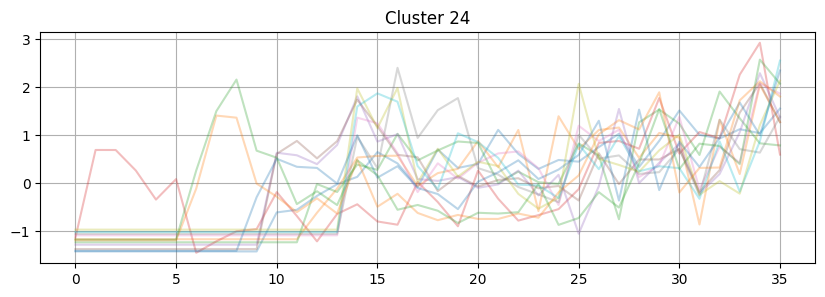

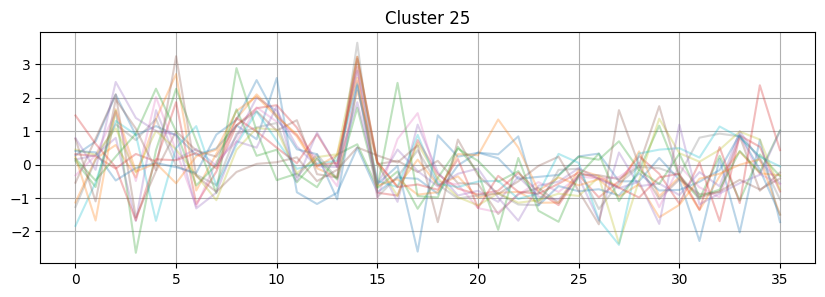

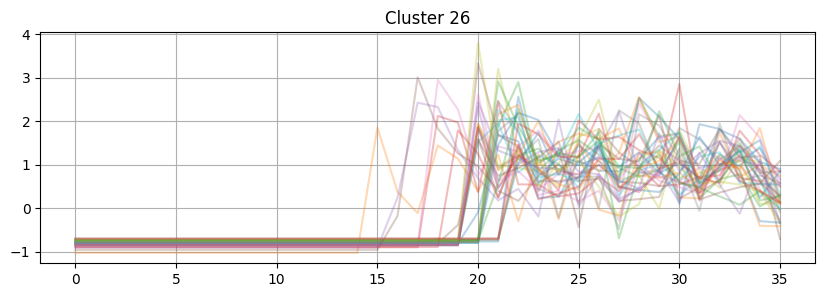

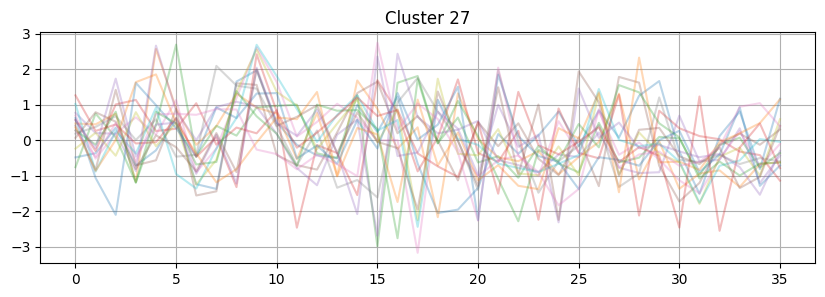

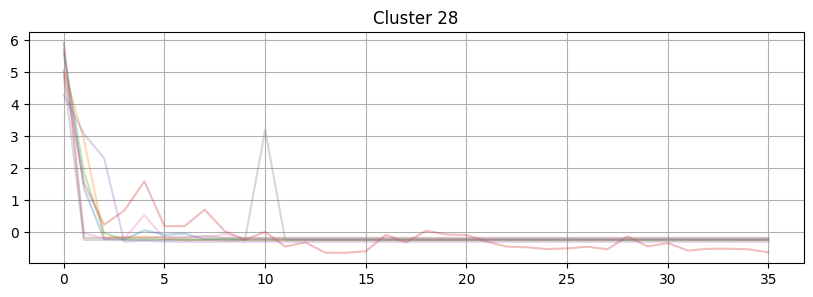

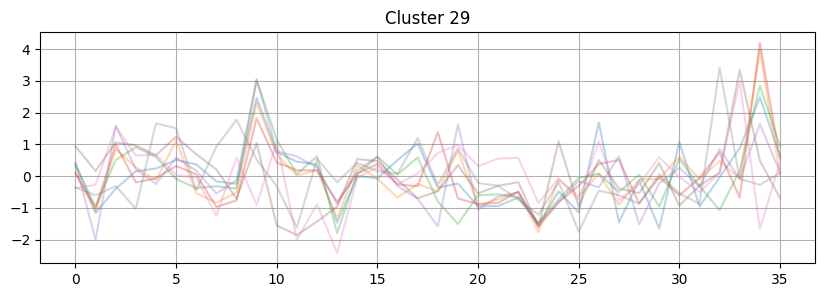

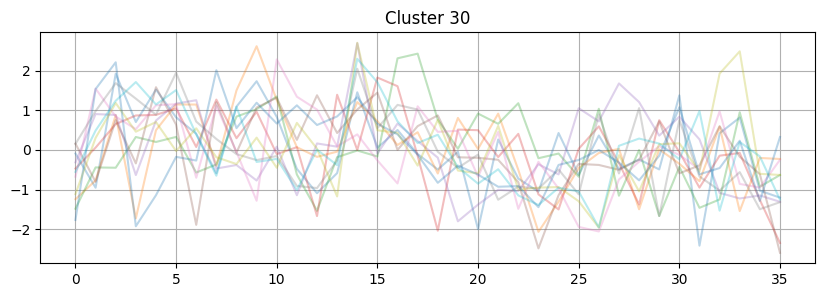

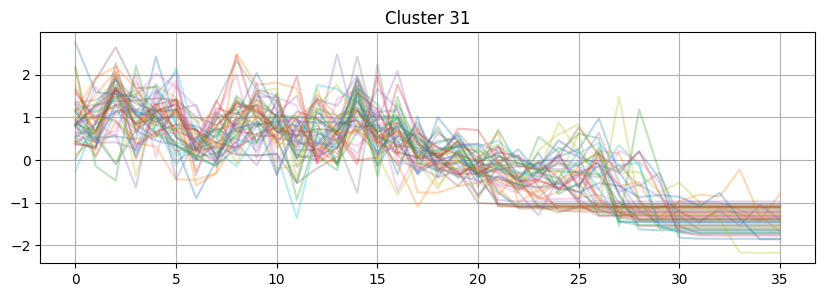

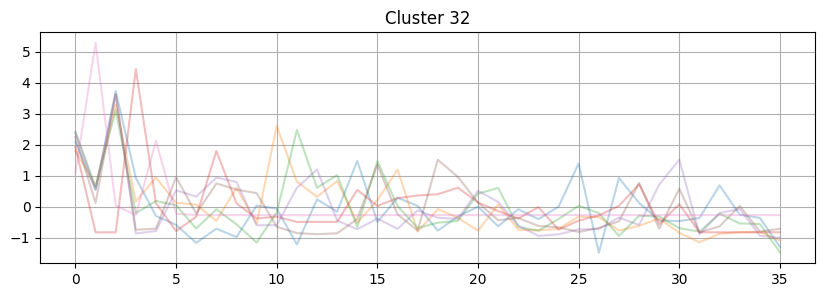

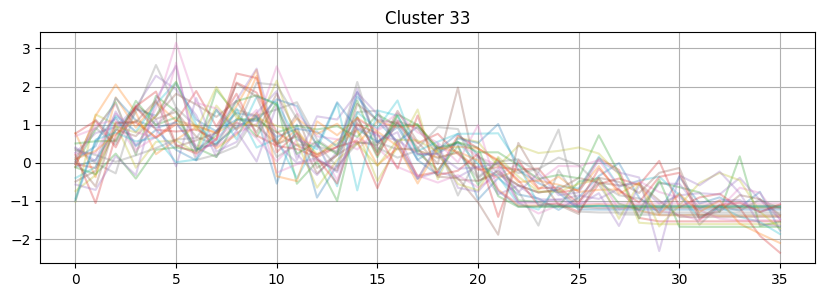

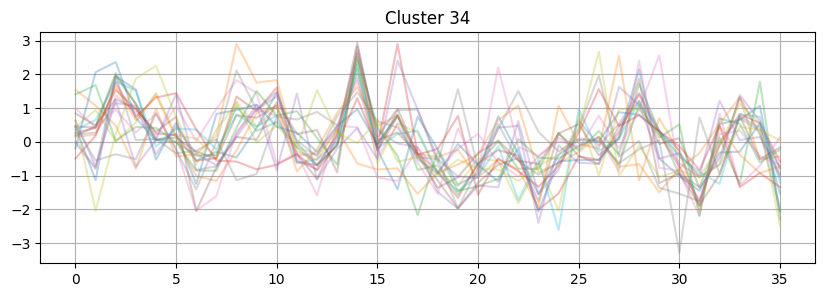

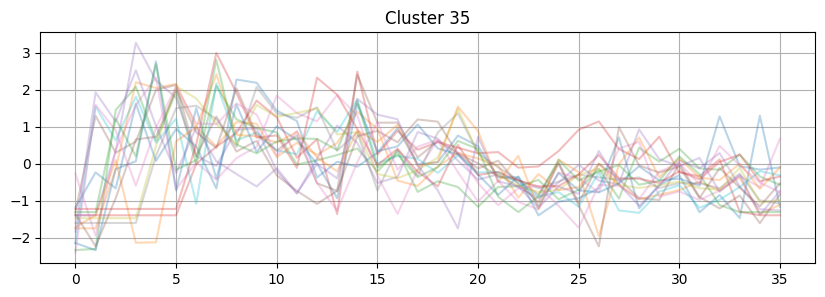

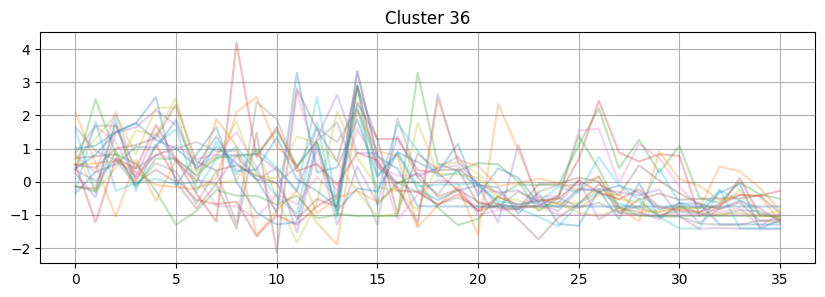

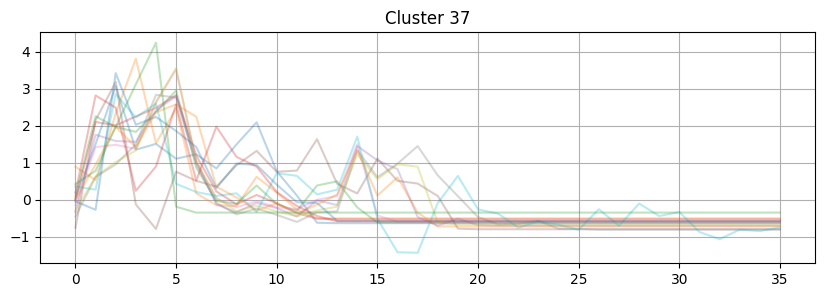

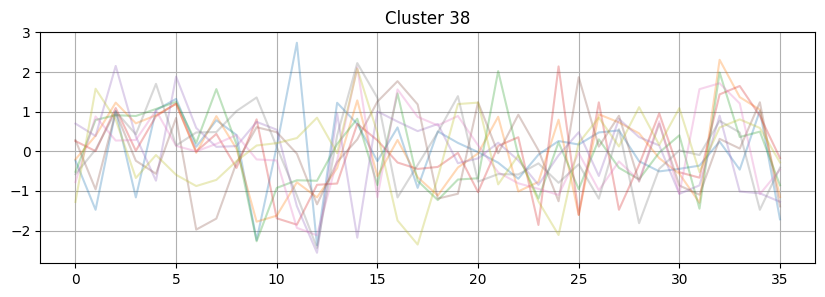

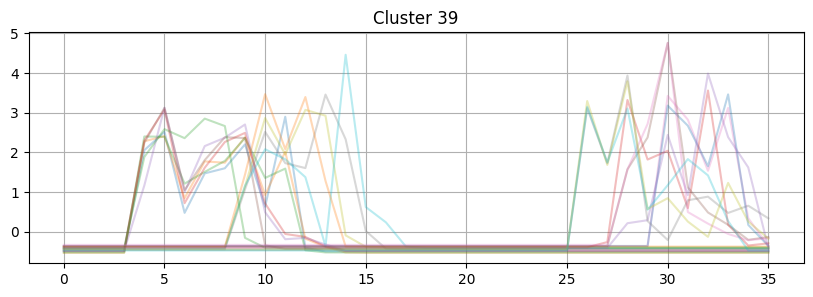

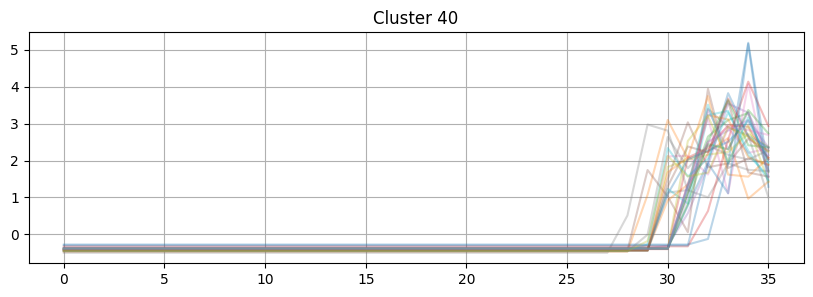

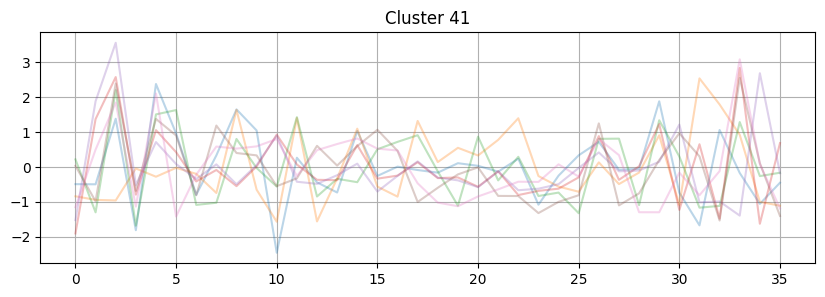

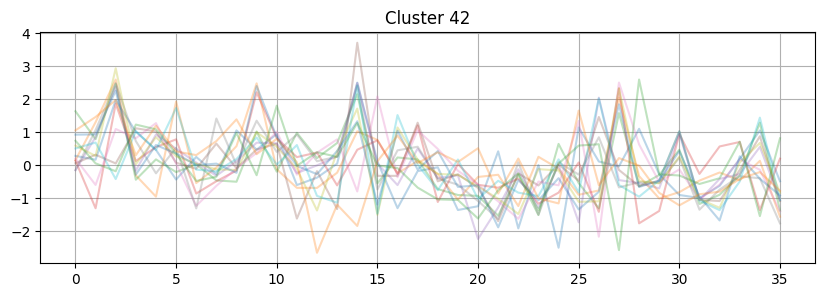

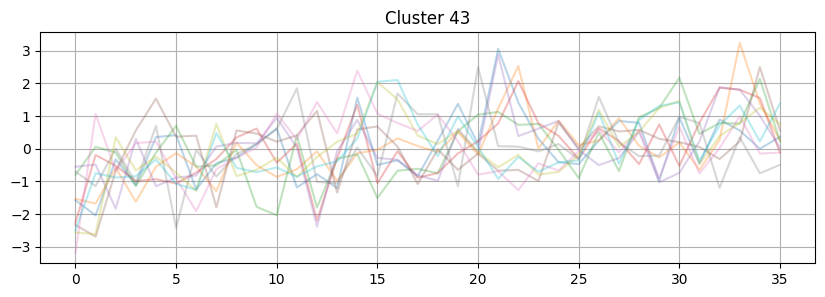

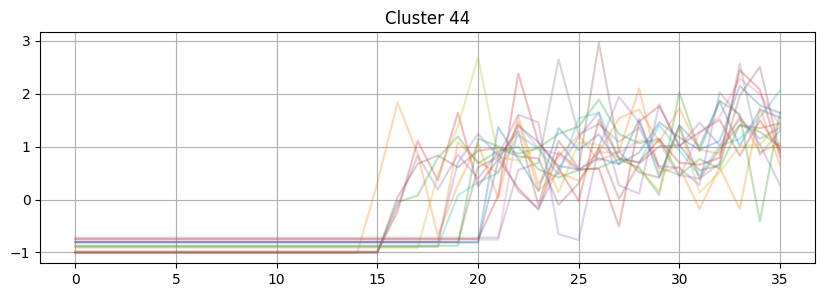

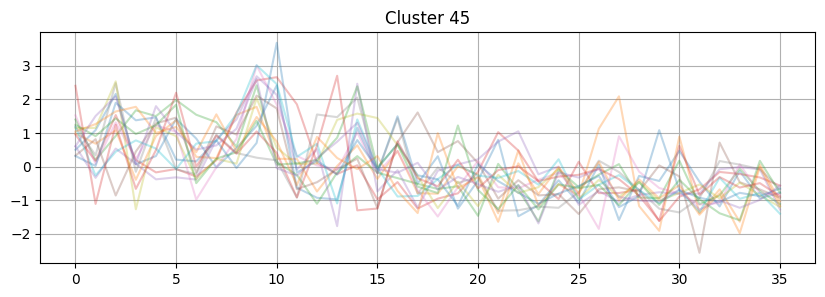

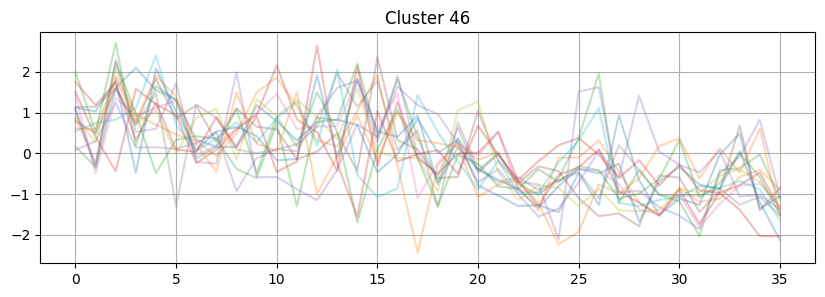

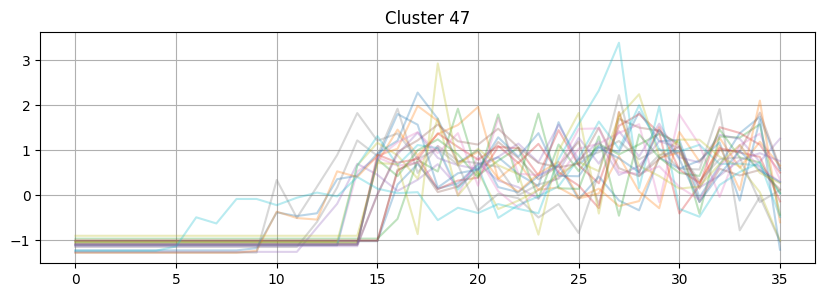

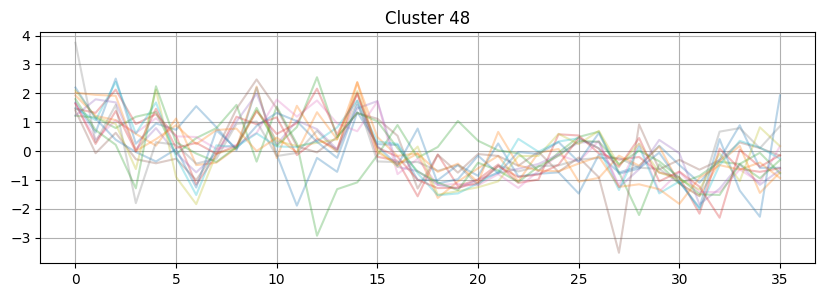

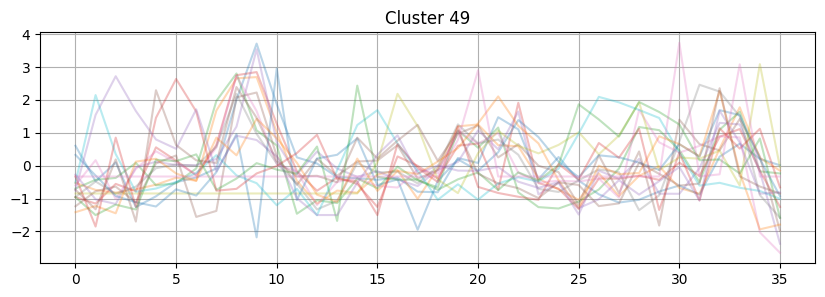

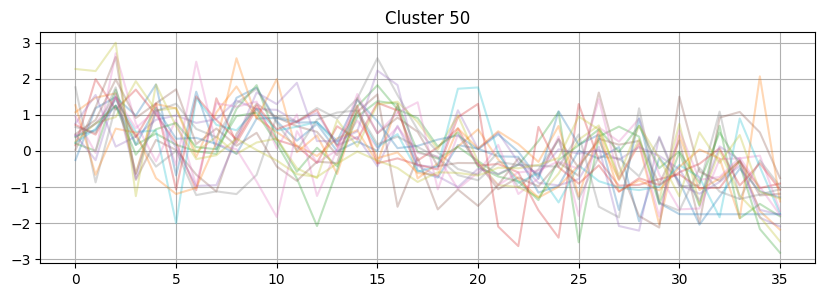

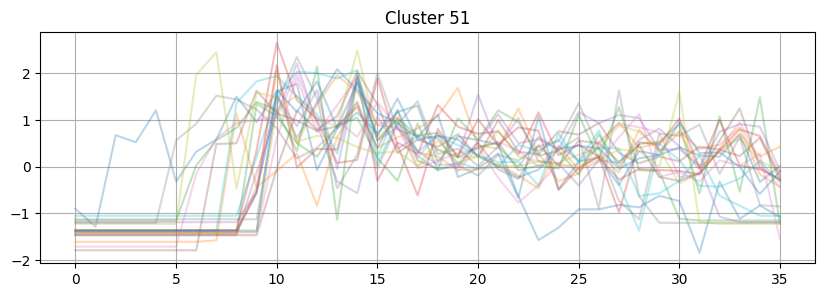

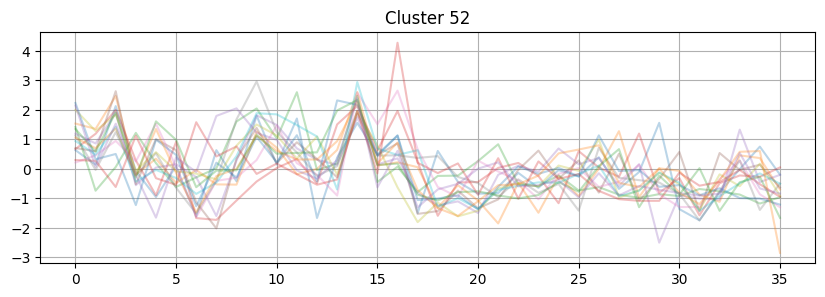

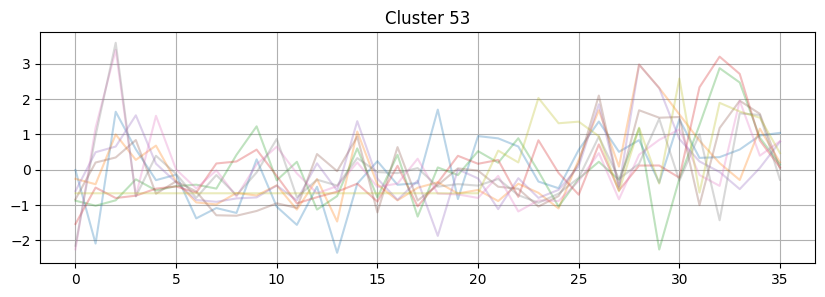

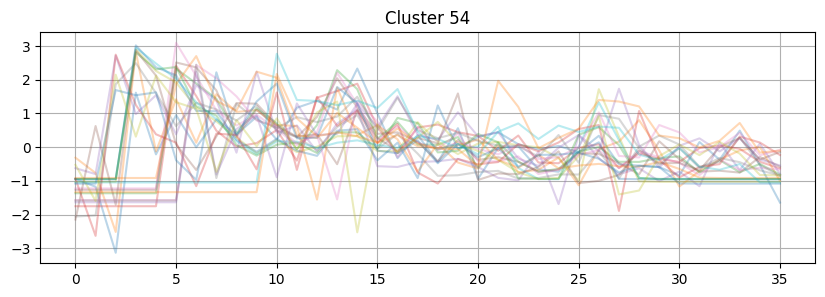

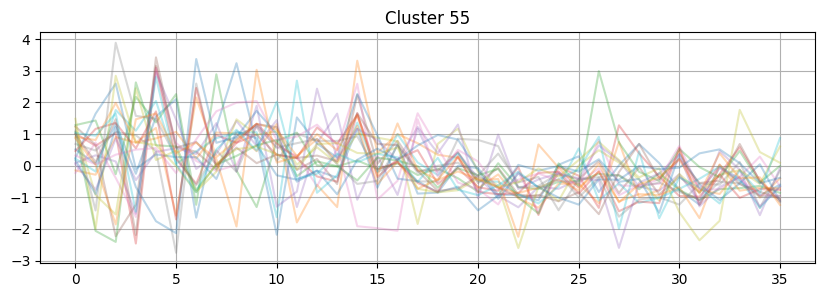

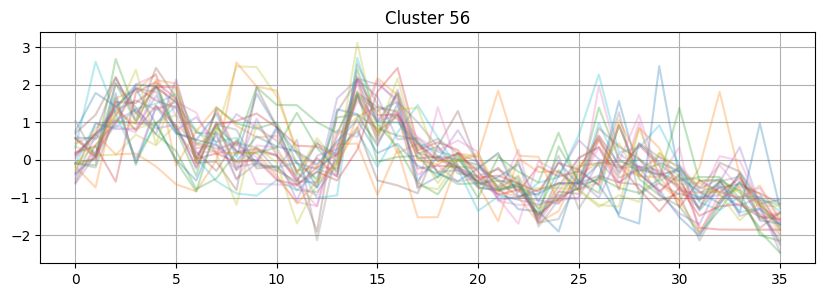

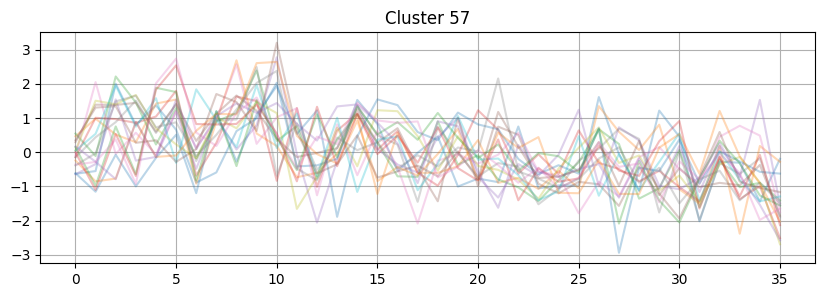

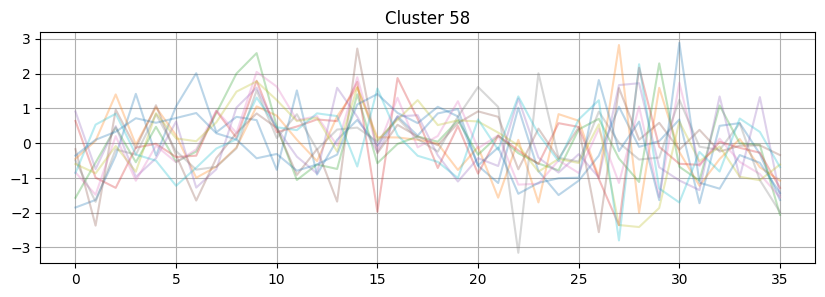

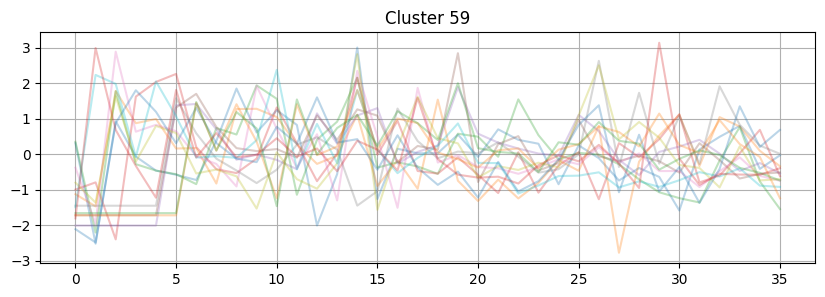

In [5]:
# 1. Preprocesar: pivotear la tabla para tener 1 fila = 1 producto
df['periodo'] = pd.to_datetime(df['periodo'], format='%Y%m')
df = df.sort_values(['product_id', 'periodo'])

# Asegurar consistencia temporal
pivot_df = df.pivot(index='product_id', columns='periodo', values='tn').fillna(0)

# 2. Escalar las series (opcional pero recomendado)
X = pivot_df.values
X_scaled = TimeSeriesScalerMeanVariance().fit_transform(X)

# 3. Clustering con DTW
n_clusters = 60  # Ajustar según el problema
model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", random_state=0)
labels = model.fit_predict(X_scaled)

# 4. Añadir etiquetas al DataFrame original
pivot_df['cluster'] = labels

# 5. Graficar los clústers
for cluster_id in range(n_clusters):
    plt.figure(figsize=(10, 3))
    for series in X_scaled[labels == cluster_id]:
        plt.plot(series.ravel(), alpha=0.3)
    plt.title(f'Cluster {cluster_id}')
    plt.grid(True)
    plt.show()

In [11]:
pivot_df.reset_index(inplace=True)
pivot_df[['product_id', 'cluster']].to_csv("../notebooks/entregable/datasets/clusters.csv", index=False, encoding='utf-8', sep=',')